In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression


In [5]:
tsla = yf.download('TSLA', period='60d', interval='1d', auto_adjust='True')
aapl = yf.download('AAPL', period='60d', interval='1d', auto_adjust='True')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
tsla.reset_index(inplace=True)
aapl.reset_index(inplace=True)

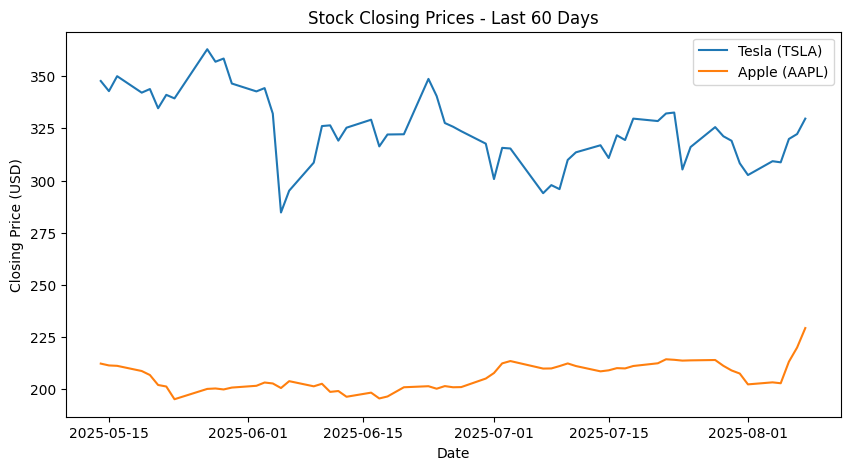

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(tsla['Date'], tsla['Close'], label='Tesla (TSLA)')
plt.plot(aapl['Date'], aapl['Close'], label='Apple (AAPL)')
plt.title('Stock Closing Prices - Last 60 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [9]:
def prepare_data(df):
    df['Target'] = df['Close'].shift(-1)
    df = df[:-1]
    x = np.array(df[['Close']])
    y = np.array(df[['Target']])
    return x, y

x_tsla, y_tsla = prepare_data(tsla)
x_aapl, y_aapl = prepare_data(aapl)

In [12]:
model_tsla = LinearRegression()
model_tsla.fit(x_tsla, y_tsla)

model_aapl = LinearRegression()
model_aapl.fit(x_aapl, y_aapl)

tsla_pred = model_tsla.predict(x_tsla)
aapl_pred = model_aapl.predict(x_aapl)

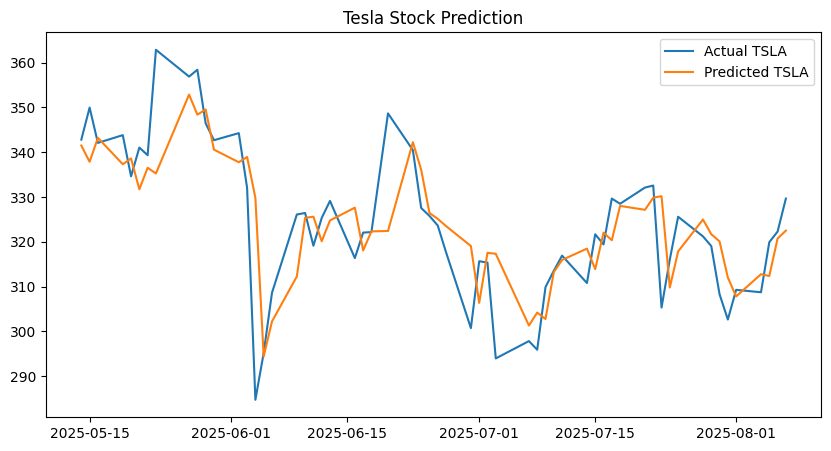

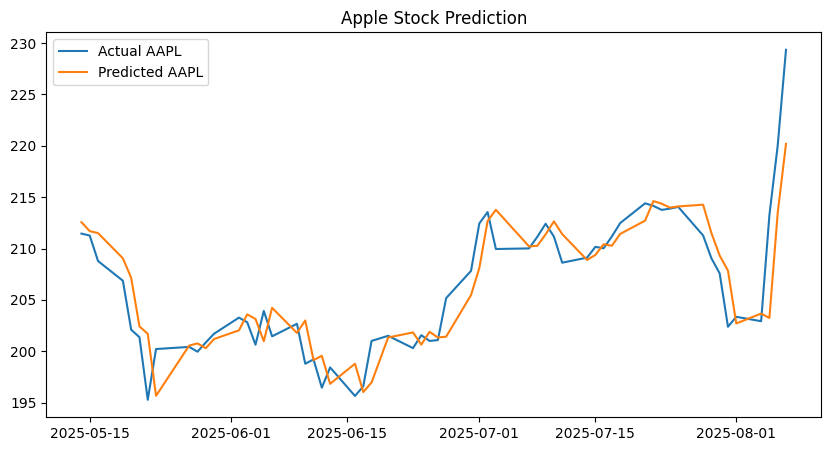

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(tsla['Date'][:-1], y_tsla, label='Actual TSLA')
plt.plot(tsla['Date'][:-1], tsla_pred, label='Predicted TSLA')
plt.title('Tesla Stock Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(aapl['Date'][:-1], y_aapl, label='Actual AAPL')
plt.plot(aapl['Date'][:-1], aapl_pred, label='Predicted AAPL')
plt.title('Apple Stock Prediction')
plt.legend()
plt.show()